<a href="https://colab.research.google.com/github/krithikp2100/ai-ml/blob/main/Part_2__Building_and_Evaluating_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#de3023"><h1><b>🚨 REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT 🚨</b></h1></font>

<h2>Numerical Classification - Day 2</h2>

<p style="font-size: 16px;">
Welcome to your second notebook, designed to take your Machine Learning skills to the next level. In this notebook, you’ll deepen your understanding of essential concepts, master the remaining steps for cleaning and formatting your dataset for machine learning, and ultimately build your very first model. Let’s get started on this exciting next chapter of your journey!
</p>


# PART 1: Choosing Your Project

<img src="https://drive.google.com/uc?export=view&id=1FGLwKxlZi7iuqD1MnwiuVHr2s9JYG4TT" height=300>



In [7]:
# @title Import Packages

%%capture

# Data handling and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Markdown, display

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dropout, LSTM, Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [8]:
%%capture

# @title Project Selection
Project = "Salary Prediction" # @param ["Salary Prediction","Heart Disease Detection","Weather Classification"]

def preprocess_data(project):
    project_configs = {
        "Salary Prediction": {
            "url": "https://drive.google.com/uc?id=154i4ydw8b6BApwhFl_Efa8EokK-5WNWe",
            "label_column": "income",
            "sample": True
        },
        "Heart Disease Detection": {
            "url": "https://drive.google.com/uc?id=1T5jPh95FWdo89xV28RoWNqjpefv_9prN",
            "label_column": "Heart Disease",
            "fill_na": {"Alcohol Intake": "None"},
            "sample": False
        },
        "Weather Classification": {
            "url": "https://drive.google.com/uc?id=1ahDAdF0inxcd6LbHIwyIxAAmWcIsVx3_",
            "label_column": "Weather Type",
            "sample": True
        }
    }

    config = project_configs[project]
    df = pd.read_csv(config["url"])
    df.rename(columns={config["label_column"]: "label"}, inplace=True)

    if config.get("fill_na"):
        for col, value in config["fill_na"].items():
            df[col] = df[col].fillna(value)

    if config["sample"]:
        df = df[~df.isin(['?']).any(axis=1)]
        sampled_df = pd.DataFrame()
        for cls in df["label"].unique():
            sampled_df = pd.concat(
                [sampled_df, df[df["label"] == cls].sample(n=600, replace=False, random_state=42)],
                axis=0
            )
        df = sampled_df.reset_index(drop=True)

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    label_encoders = {col: LabelEncoder() for col in categorical_cols}
    for col, le in label_encoders.items():
        df[col] = le.fit_transform(df[col])

    return df, label_encoders

df, label_encoders = preprocess_data(Project)

# PART VI: Training a model

<img src="https://drive.google.com/uc?export=view&id=1xpMpHQwgrs6c6Yn3hLX4n1GPiuBZARfM" height=400>

## 🔢 Convert your labels to one-hot-encodings


Different machine learning models require labels to be in specific formats. Behind the scenes, these models perform mathematical operations to predict a label from a set of numerical inputs or features. To train our model and make accurate predictions, we need to ensure that both our features and labels are in numerical form.

This was the purpose of Part 1 in this series and in order to streamline the process, we've provided a clean version of ```df``` accessible in this notebook.

If we were building a neural network with a package like TensorFlow, our labels would need to be one-hot encoded. In this format, each label is represented as a vector indicating the probability that the provided features belong to each of the categories in our dataset.

For models like Logistic Regression through sklearn, however, labels should be represented as single numerical values instead of vectors.

Note: Here are a couple examples of how we want to transform our labels.
```
category 0 -> [1, 0, 0, ...]
category 1 -> [0, 1, 0, ...]
category 2 -> [0, 0, 1, ...]
...
```

### Exercise 6A


Convert your data's labels (```df['labels']```) into a one-hot encoded vector (```df['labels_ohe']```), as shown in the example above.  Hint: You can use the pandas function [```pd.get_dummies()```](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Sometimes a one-hot-encoded version of a variable is called a "dummy variable".


⭐ **BONUS (difficult)** ⭐ Try to one-hot encode your labels *without* using the ```get_dummies``` function!

In [4]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'label'],
      dtype='object')


In [31]:
df['label']

,label
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,1
1197,1
1198,1


In [9]:
labels = df['label']
label_encoders = {0: False, 1: True}
df['labels_ohe'] = df['label'].map(label_encoders)
labels_ohe = df['labels_ohe']
print("label #1:", labels[0])
print("label #1 converted to OHE:", labels_ohe[0])

label #1: 0
label #1 converted to OHE: False


In [4]:
#@title Example Solution
labels_ohe = pd.get_dummies(df['label'], dtype = int).to_numpy().tolist() # Using the get_dummies() function to one-hot encode your labels.
df['labels_ohe'] = labels_ohe

# Bonus: without using the get dummies function
# possible_labels = list(set(labels))
# label_dict = {possible_labels[i]:i for i in range(len(possible_labels))}
# y = np.array([[0 for _ in possible_labels] for _ in labels])
# for i,label in enumerate(labels):
#   y[i][label_dict[label]] = 1

# print("label #1:", labels[0])
# print("label #1 converted to OHE:", labels_ohe[0])

Now that you have your one-hot-encoded labels (```labels_ohe```), you can convert these back into a single-label format using a function like [```np.argmax()```](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

Note: Your df already has a column that contains label in this format (```df['label']```). The below is commented out as it is just a reference code


In [10]:
# labels_single = np.argmax(labels_ohe, axis = 1)
# df['label'] = labels_single
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,label,label_ohe
0,22,2,48347,9,13,4,3,3,4,1,0,0,40,30,0,False
1,23,2,234302,11,9,4,4,1,2,1,0,0,40,30,0,False
2,37,2,95855,1,7,0,4,1,4,0,0,0,40,30,0,False
3,24,4,172047,7,12,4,1,3,4,1,0,0,40,30,0,False
4,31,2,184307,15,10,0,1,1,4,1,0,0,40,30,0,False


## 🍕 Train test split

<img src="https://drive.google.com/uc?export=view&id=1f9HECt_VTMPYTAt-NcpmfCN-cKbv6A6G" height=300>




In Python, different machine learning packages expect input data in specific formats. For instance, in this notebook, we’ll be using ```sklearn``` to build a Logistic Regression model.

In order to simplify the model building piece, we'll split our ```df``` into two separate dataframes (X and y). This will allow us to keep our inputs and label separate.

In [10]:
X = df.drop(columns=['label', 'labels_ohe'])
y = df.drop(columns=['labels_ohe'])['label']

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1200, 14)
Shape of y:  (1200,)


In [14]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,1
1197,1
1198,1


### Exercise 6B

Split up your features and labels into a training and testing dataset. Hint: you can use the function ```train_test_split()```.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y) ### YOUR CODE HERE

print('# of samples in X_train:', len(X_train))
print('# of samples in y_train:', len(y_train))
print('# of samples in X_test:', len(X_test))
print('# of samples in y_test:', len(y_test))

# of samples in X_train: 900
# of samples in y_train: 900
# of samples in X_test: 300
# of samples in y_test: 300


In [12]:
#@title Example Solution
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('# of samples in X_train:', len(X_train))
print('# of samples in y_train:', len(y_train))
print('# of samples in X_test:', len(X_test))
print('# of samples in y_test:', len(y_test))

# of samples in X_train: 900
# of samples in y_train: 900
# of samples in X_test: 300
# of samples in y_test: 300


### 💻 Machine Learning Models

You've learned a lot about machine learning models over the past week! Some supervised machine learning models you have touched on have been: K-means classifiers, logistic regression, linear regression, fully connected neural networks, and convolutional neural networks!

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Supervised_machine_learning_in_a_nutshell.svg" height=200>

### Exercise 6C

**Example Model Development Walkthrough: Logistic Regression**

A very simple classification model that we can use is [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Let us walk through its creation below:


```python
# Step 1: Initialization
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# Step 2: Training
logistic_model.fit(YOUR X_TRAIN, YOUR Y_TRAIN)

# Step 3: Prediction
predictions = logistic_model.predict(YOUR X_TEST)

# Step 4: Evaluation
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test_c, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))


Take some time to build your very first model!

In [ ]:
for column in X.columns:
  sns.catplot(data = df, x=column, y='label', kind='swarm')

In [11]:
print((X == 0).sum().sum())
print(X.values.size)

3427
16800


In [32]:
y_train.head()

,label
740,1
947,1
793,1
203,0
425,0


In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_scaled

array([[-1.35271453, -0.23675302, -1.1207529 , ..., -0.25905013,
        -3.53593465,  0.46931735],
       [-0.14060474, -0.23675302, -1.50926932, ..., -0.25905013,
        -0.24743392,  0.25833552],
       [ 0.0210099 , -0.23675302,  0.09397541, ..., -0.25905013,
        -0.24743392,  0.25833552],
       ...,
       [ 0.99069774, -0.23675302, -0.41936369, ..., -0.25905013,
        -0.24743392,  0.25833552],
       [ 0.10181722, -0.23675302, -1.43879425, ..., -0.25905013,
        -0.24743392,  0.25833552],
       [ 0.90989042,  0.79260792, -0.1987089 , ..., -0.25905013,
        -0.24743392,  0.25833552]])

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_scaled, y_train)

predictions = logistic_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)

print('Logistic Regression Model Accuracy: {:.2%}'.format(score))


Logistic Regression Model Accuracy: 70.67%


In [26]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)

print('Logistic Regression Model Accuracy: {:.2%}'.format(score))


Logistic Regression Model Accuracy: 67.00%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression

# X_train, X_test = X_scaled, X_test_scaled

newton_cg = LogisticRegression(solver='newton-cg')
newton_cholesky = LogisticRegression(solver='newton-cholesky')
logistic_model = LogisticRegression(solver='lbfgs')
sag = LogisticRegression(solver='sag')
liblinear = LogisticRegression(solver='liblinear')
saga = LogisticRegression(solver='saga')


logistic_model.fit(X_train, y_train)
newton_cholesky.fit(X_train, y_train)
newton_cg.fit(X_train, y_train)
sag.fit(X_train, y_train)
saga.fit(X_train, y_train)
liblinear.fit(X_train, y_train)


predictions = logistic_model.predict(X_test)
cg_predictions = newton_cg.predict(X_test)
cholesky_predictions = newton_cholesky.predict(X_test)
sag_predictions = sag.predict(X_test)
ll_predictions = liblinear.predict(X_test)
saga_predictions = saga.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score

score = accuracy_score(y_test, predictions)
cg_score = accuracy_score(y_test, cg_predictions)
cholesky_score = accuracy_score(y_test, cholesky_predictions)
sag_score = accuracy_score(y_test, sag_predictions)
ll_score = accuracy_score(y_test, ll_predictions)
saga_score = accuracy_score(y_test, saga_predictions)


print('Logistic Regression Model Accuracy: {:.5%}'.format(score))
print('Newton Cg Model Accuracy: {:.5%}'.format(cg_score))
print('Newton Cholesky Regression Model Accuracy: {:.5%}'.format(cholesky_score))
print('SAG Regression Model Accuracy: {:.5%}'.format(sag_score))
print('Liblinear Regression Model Accuracy: {:.5%}'.format(ll_score))
print('SAGA Regression Model Accuracy: {:.5%}'.format(saga_score))

score = precision_score(y_test, predictions)
cg_score = precision_score(y_test, cg_predictions)
cholesky_score = precision_score(y_test, cholesky_predictions)
sag_score = precision_score(y_test, sag_predictions)
ll_score = precision_score(y_test, ll_predictions)
saga_score = precision_score(y_test, saga_predictions)


print('Logistic Regression Model Precision: {:.5%}'.format(score))
print('Newton Cg Model Precision: {:.5%}'.format(cg_score))
print('Newton Cholesky Regression Model Precision: {:.5%}'.format(cholesky_score))
print('SAG Regression Model Precision: {:.5%}'.format(sag_score))
print('Liblinear Regression Model Precision: {:.5%}'.format(ll_score))
print('SAGA Regression Model Precision: {:.5%}'.format(saga_score))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge a

Logistic Regression Model Accuracy: 66.00000%
Newton Cg Model Accuracy: 72.00000%
Newton Cholesky Regression Model Accuracy: 71.66667%
SAG Regression Model Accuracy: 59.00000%
Liblinear Regression Model Accuracy: 72.33333%
SAGA Regression Model Accuracy: 59.00000%
Logistic Regression Model Precision: 67.56757%
Newton Cg Model Precision: 72.72727%
Newton Cholesky Regression Model Precision: 72.25806%
SAG Regression Model Precision: 84.44444%
Liblinear Regression Model Precision: 72.90323%
SAGA Regression Model Precision: 84.44444%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


How well did your model perform? What does this mean?

In [55]:
#@title

reflection = "70.67%" # @param {type:"string"}

# PART VII: Evaluating your model

<img src="https://cdn.prod.website-files.com/6391b5b30283a58cafb3bb77/66645273e7266bd35af722ca_how-to-evaluate-ai.jpeg" height=400>

## Accuracy

Accuracy is a fundamental metric used to evaluate the performance of a machine learning model. It is defined as the proportion of correct predictions made by the model out of all predictions. Mathematically, it can be expressed as:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

For classification tasks, accuracy is particularly useful when the dataset is balanced, meaning each class has roughly the same number of samples. It provides a simple way to gauge how well the model is performing.

### Exercise 7A

Use the ```accuracy_score``` function from sklearn to calculate your accuracy.

Note: We've already defined our y_true and y_pred as ```y_test``` and ```predictions``` respectively.

In [56]:
accuracy_score(y_test, predictions)

0.7066666666666667

However, accuracy has limitations, especially with imbalanced datasets where one class dominates. In such cases, a model might achieve high accuracy by simply predicting the majority class, even if it performs poorly on the minority class. To address this, additional metrics like precision, recall, and F1-score are often used for a more nuanced evaluation. We'll explore these in the coming sections

## Confusion Matrices

A **Confusion Matrix** is a tabular representation used to evaluate the performance of a classification model. It compares the actual labels with the predicted labels, providing a detailed breakdown of model performance across all classes.

The matrix is organized as follows:

\begin{bmatrix}
\text{True Positive (TP)} & \text{False Positive (FP)} \\
\text{False Negative (FN)} & \text{True Negative (TN)}
\end{bmatrix}

1. **True Positive (TP):** The model correctly predicted the positive class.
2. **False Positive (FP):** The model incorrectly predicted the positive class when it was actually negative.
3. **False Negative (FN):** The model incorrectly predicted the negative class when it was actually positive.
4. **True Negative (TN):** The model correctly predicted the negative class.

The confusion matrix is particularly valuable for understanding where a model makes errors, such as misclassifying one class as another. It is especially important in imbalanced datasets, where accuracy alone might be misleading. We can also calculate a series of other metrics from our confusion matrix.

### Exercise 7B

Use the ```confusion_matrix``` function from sklearn to create your matrix. You can then use ```ConfusionMatrixDisplay``` and matplotlib to plot your confusion matrix!

Note: We've already defined our y_true and y_pred as ```y_test``` and ```predictions``` respectively.

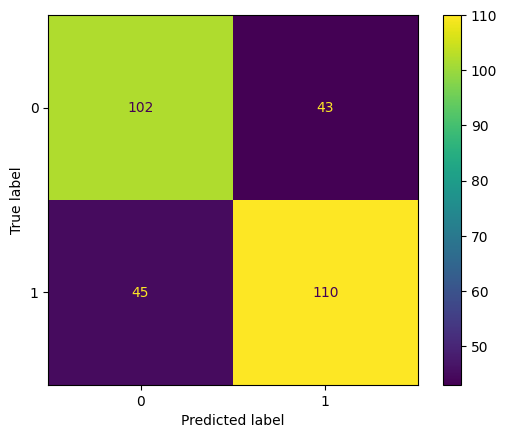

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()
# plt.show()

How many of each True Positives, True Negatives, False Positives and False Negatives are you seeing?

In [ ]:
#@title

reflection = "" # @param {type:"string"}

## Recall and Precision

**Recall** and **Precision** are key metrics derived from the confusion matrix that measure different aspects of a model's performance.


---


**Recall (Sensitivity or True Positive Rate)**

Recall quantifies the ability of the model to correctly identify all positive instances. It is defined as:

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

High recall indicates that the model correctly captures most of the actual positives but may also include false positives.


---


**Precision (Positive Predictive Value)**
Precision measures how many of the positive predictions made by the model are actually correct. It is defined as:

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

High precision implies the model's positive predictions are highly accurate but may miss some true positives.


---


**The Precision-Recall Trade-Off**
There is an inherent trade-off between precision and recall. Improving one often comes at the cost of the other:

- **High Recall, Low Precision:** The model captures most positives but also includes many false positives.
- **High Precision, Low Recall:** The model is very confident in its positive predictions but misses many true positives.

This trade-off is often controlled by the decision threshold for classifying instances as positive. Adjusting this threshold allows you to balance recall and precision based on the problem's requirements.

### Exercise 7C

Use the ```recall_score``` and ```precision_score``` functions from sklearn to generate your metrics

Note: We've already defined our y_true and y_pred as ```y_test``` and ```predictions``` respectively.

In [73]:
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))

0.7066666666666667
0.7096774193548387
0.7189542483660131


Take your best attempt at explaining what these numbers mean in the context of your chosen project.

In [ ]:
#@title

reflection = "" # @param {type:"string"}

## F1 Score

In [ ]:
N

The **F1 Score** is a performance metric that combines **precision** and **recall** into a single value, providing a balanced measure for models where both metrics are important. It is especially useful when dealing with imbalanced datasets, where accuracy might be misleading.


---


**Formula for F1 Score**
The F1 Score is the harmonic mean of precision and recall, defined as:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


---


**Interpretation**
- A **high F1 Score** indicates that the model achieves both high precision and high recall, effectively balancing the trade-off between the two.
- A **low F1 Score** suggests that the model struggles with either precision, recall, or both.


---


**When to Use F1 Score**
The F1 Score is most valuable in scenarios where:
1. The cost of false positives and false negatives is significant.
2. The dataset is imbalanced, and accuracy alone does not provide meaningful insights into model performance.

By focusing on both precision and recall, the F1 Score ensures that a model's predictions are not only accurate but also comprehensive.

### Exercise 7D

Use the ```f1_score``` function from sklearn to generate your F1 Score.

Note: We've already defined our y_true and y_pred as ```y_test``` and ```predictions``` respectively.

In [74]:
f1_score(y_test, predictions)

0.7142857142857143

Take your best attempt at explaining what these numbers mean in the context of your chosen project.

In [ ]:
#@title

reflection = "" # @param {type:"string"}

## ROC / AUC

**ROC (Receiver Operating Characteristic)** and **AUC (Area Under the Curve)** are tools used to evaluate the performance of a classification model, particularly in binary classification tasks.

**ROC Curve**
The ROC curve is a graphical representation of the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** at various classification thresholds.
[link text](https://)
- **True Positive Rate (Recall):**
  \[
  \text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  \]

- **False Positive Rate:**
  \[
  \text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
  \]

The ROC curve plots **TPR** (y-axis) against **FPR** (x-axis) for different thresholds. A model with a better discriminatory ability will have a curve closer to the top-left corner.

**AUC (Area Under the Curve)**
The AUC is the area under the ROC curve and provides a single value summarizing the model's performance:

- **AUC = 1.0:** Perfect model.
- **AUC = 0.5:** No discriminatory power (equivalent to random guessing).
- **AUC < 0.5:** Worse than random guessing.

**Interpretation**
- A higher AUC indicates that the model is better at distinguishing between the positive and negative classes across all thresholds.
- The ROC-AUC metric is threshold-independent, making it a robust measure for comparing models, especially in datasets with imbalanced classes.

By analyzing the ROC curve and AUC, you can assess how well your model differentiates between classes, providing deeper insights beyond accuracy alone.

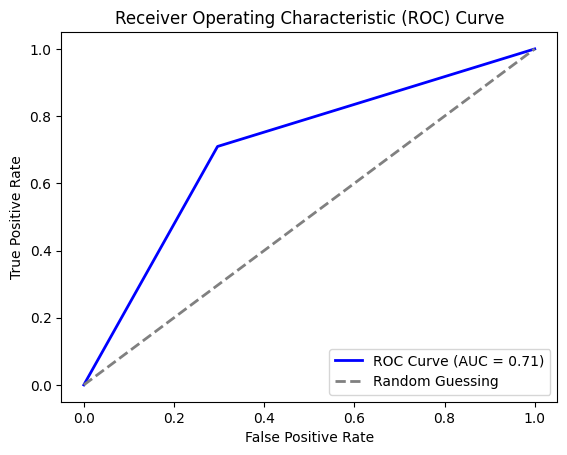

In [81]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
print
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

How well did your model perform? What does this mean?

In [ ]:
#@title

reflection = "" # @param {type:"string"}

# PART VIII: Day 2 Homework


1. Explore other baseline models to expand your understanding and improve your approach. Collaborate with your mentor and utilize our [Baseline Model Task Sheet](https://docs.google.com/document/d/12RvGg0MN3PMe9GJNQ3xwcqx9px3vqEYn1Cu1Nwv_1C8/edit?usp=sharing) to stay organized and on track throughout the process.

2. Return to your project notebook and implement these steps using your own dataset. Remember that variable names and structures may differ, so be prepared to adapt your code as needed.

3. Take time to reflect on your experience. What challenges did you face? What didn’t work, and what worked well? Don’t hesitate to seek guidance from your mentor or attend Open Labs—boilerplate code often requires adjustments for unique datasets! Embrace the challenges; the true beauty of coding lies in solving problems and the immense satisfaction of conquering errors!

### 🎁 Wrapping Up Day 2

🎉 **Congratulations on Building Your First Machine Learning Model!** 🎉  
Amazing work! You’ve taken a significant step in your journey by creating your very first machine learning model. This is no small feat—it’s the foundation upon which incredible projects are built. 🚀 As you advance your skills and bring your own ideas to life, remember to revisit these notebooks as valuable references to guide your progress.

But why stop here? The world of machine learning is vast, and there’s so much more to explore. Below, you’ll find additional resources and optional enhancements to take your projects to the next level. 🌟

---

### **Expand Your Horizons with Optional Enhancements**

- **Dive Into Advanced Models**  
   Ready to elevate your projects further? Explore advanced models like Neural Networks and use advanced Python frameworks like PyTorch or Tensorflow to unlock more predictive power and uncover deeper insights.

- **Unlock the Power of Ensemble Learning**  
   Supercharge your projects with cutting-edge ensemble learning techniques
   
   👉 [Ensemble Learning](https://colab.research.google.com/drive/1wNF2sob8CJWaVqGbe4vZQt1EaoPneKHH?usp=drive_link)

---

### 🌟 **What’s Next?**
- **Experimentation**: Don’t be afraid to try new techniques and push the boundaries of what your model can do.
- **Iteration**: Refine your skills by iterating on your projects, optimizing performance, and exploring new datasets.  
- **Collaboration**: Share your work with mentors, peers, or in Open Labs to gain insights and fresh perspectives.

Every model you build and every enhancement you implement is a step closer to mastery. Keep learning, keep growing, and keep building—your journey has just begun! 🚀